
# ARIMA and Seasonal ARIMA


## Autoregressive Integrated Moving Averages

The general process for ARIMA models is the following:
* Clean up the data
* Visualize the Time Series Data
* Make the time series data stationary
* Plot the Correlation and AutoCorrelation Charts
* Construct the ARIMA Model or Seasonal ARIMA based on the data
* Use the model to make predictions

Let's go through these steps!

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from datetime import datetime
%matplotlib inline
from datetime import timedelta


import warnings
warnings.filterwarnings("ignore")

# Let's forecast champagne sales!

## Step 1: Clean up the data

In [2]:
# read data
df=pd.read_csv('champagne.csv')
df

,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0
...,...,...
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0
105,NaN,NaN


In [ ]:
## cleaning up the data

# 1. rename columns

# 2. find the index of all NaN values


In [ ]:
# drop rows with NaN values

# check if there are any NaN values left


In [5]:
# convert Month into datetime and set Month as index


In [8]:
# use .describe() to inspect the general statistic properties of our data 



,Sales
count,105.000000
mean,4761.152381
std,2553.502601
min,1413.000000
25%,3113.000000
50%,4217.000000
75%,5221.000000
max,13916.000000


## Step 2: Visualize the Data

<AxesSubplot:xlabel='Month'>

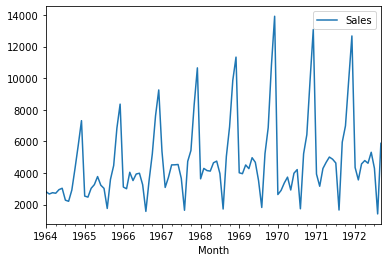

In [9]:
# plot the data


> Conclusion: <br> We recognize a clear upward trend and seasonality.

### To be sure, let's test for stationarity with ADF Test.
* H0: It is non stationary
* H1: It is stationary

In [10]:
# use the augmented Dickey-Fuller Test to test for stationarity
# hint: use the adfuller() function
# interpret the output



ADF Test Statistic : -1.833593056327623
p-value : 0.363915771660245
#Lags Used : 11
Number of Observations Used : 93
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


## Step 3: Make the Time Series Stationary

In [12]:
# Differencing with 1-Month Shift
df['Sales First Difference'] = df['Sales'] - df['Sales'].shift(1)

# Calculate the seasonal differences


In [ ]:
# show first 14 month to see the results
df.head(14)

In [ ]:
## Again check the differences for stationarity with ADF Test
# don't forget to drop the NaN values (you can use .dropna())



<AxesSubplot:xlabel='Month'>

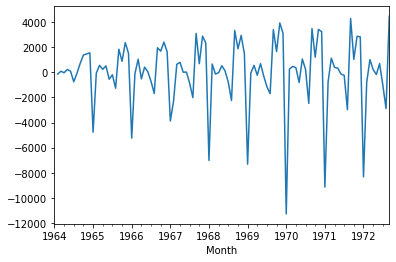

In [16]:
# plot and see by yourself - is it stationary now?

## Step 4: Plot the Autocorrelation and Partial Autocorrelation Charts

> Identification of an __AR model__ is often best done with the __PACF__.
<br><br>
For an AR model, the theoretical PACF “shuts off” past the order of the model.  The phrase “shuts off” means that in theory the partial autocorrelations are equal to 0 beyond that point.  Put another way, the number of non-zero partial autocorrelations gives the order of the AR model.  By the “order of the model” we mean the most extreme lag of x that is used as a predictor.

    
> Identification of an __MA model__ is often best done with the __ACF__ rather than the PACF.
<br><br>
For an MA model, the theoretical PACF does not shut off, but instead tapers toward 0 in some manner.  A clearer pattern for an MA model is in the ACF.  The ACF will have non-zero autocorrelations only at lags involved in the model.
    
(p,d,q) = (AR model lags, differencing, MA lags)

In [ ]:
# Plot ACF and PACF with 40 lags each for the Seasonal First Difference

## Step 5: Construct the (seasonal) ARIMA

### Define test and training dataset

In [71]:
# use following dates
train_end = datetime(1971,6,1)
test_end = datetime(1972,9,1)

# divide your dataset in train and test data



In [73]:
# Use the column "Sales" for the first Model


### ARIMA

In [74]:
# Lets first fit an ARIMA model with
# p=1, d=1, q=1
# hint: use the function ARIMA()



<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Sales   No. Observations:                   90
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -813.015
Date:                Fri, 14 Oct 2022   AIC                           1632.031
Time:                        16:56:59   BIC                           1639.497
Sample:                    01-01-1964   HQIC                          1635.040
                         - 06-01-1971                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4703      0.138      3.404      0.001       0.200       0.741
ma.L1         -0.9631      0.072    -13.345      0.000      -1.105      -0.822
sigma2      4.947e+06   5.96e+05      8.302      0.000    3.78e+06    6.11e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.91   Jarque-Bera (JB):                 5.47
Prob(Q):                              0.34   Prob(JB):                         0.06
Heteroskedasticity (H):               4.00   Skew:                            -0.04
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.21
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### Non-Rolling Forecast (ARIMA)

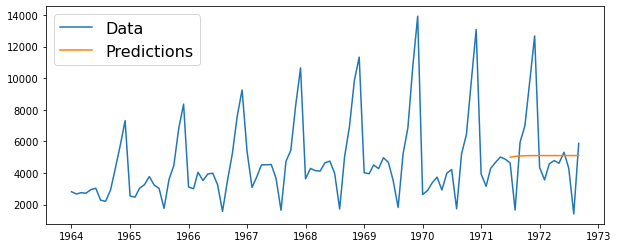

In [75]:
# get the forecast values of the test dataset
# add them to the dataset in a new column


# plot to compare your forecast to the actual values like below



In [76]:
# calculate residulas and the following errors
# 1. Mean Absolute Percent Error
# 2. Root Mean Squared Error


Mean Absolute Percent Error: 0.4988
Root Mean Squared Error: 2760.5888


> Conclusion: <br> This out-of sample forecast converges to the mean in the long run. A better approach might be a rolling forecast instead.

### Rolling forecast (ARIMA)

Text(0, 0.5, 'Production')

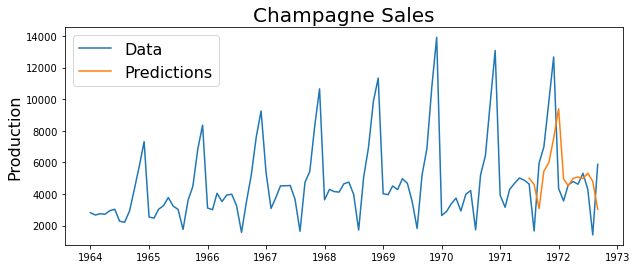

In [77]:
# use a rolling forecast considering the actual data to predict next month
# use a copy of the test data for the rolling predictions
# for every new datapoint you need to fit the AR model again


# plot to compare the rolling forecast with the actual values



In [78]:
# calculate residulas and the following errors
# 1. Mean Absolute Percent Error
# 2. Root Mean Squared Error


Mean Absolute Percent Error: 0.5496
Root Mean Squared Error: 2698.0842


### SARIMA
Now lets integrate the seasonal component.

In [79]:
# use SARIMAX to construct the seasonal ARIMA model
# hint: use the function sm.tsa.statespace.SARIMAX()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              Sales   No. Observations:                   90
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -622.489
Date:                            Fri, 14 Oct 2022   AIC                           1254.978
Time:                                    16:57:10   BIC                           1266.697
Sample:                                01-01-1964   HQIC                          1259.666
                                     - 06-01-1971                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3053      0.093      3.291      0.001       0.123       0.487
ma.L1         -0.9448      0.052    -18.051      0.000      -1.047      -0.842
ar.S.L12      -0.6094      0.269     -2.267      0.023      -1.136      -0.082
ma.S.L12       0.3598      0.280      1.283      0.199      -0.190       0.909
sigma2      5.533e+05   7.54e+04      7.343      0.000    4.06e+05    7.01e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.27   Jarque-Bera (JB):                 4.09
Prob(Q):                              0.60   Prob(JB):                         0.13
Heteroskedasticity (H):               1.91   Skew:                            -0.18
Prob(H) (two-sided):                  0.11   Kurtosis:                         4.07
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

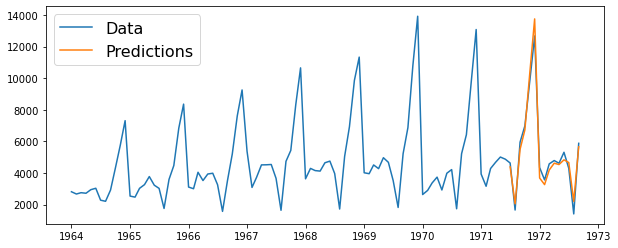

In [80]:
# get SARIMA forecast from test data


# Plot to compare


In [81]:
# calculate residuals and errors


Mean Absolute Percent Error: 0.1122
Root Mean Squared Error: 493.5783


> Conclusion: <br> The SARIMA with a seasonal component performs much better for this data set. Lets also try a rolling forecast here.

### Rolling forecast (SARIMA)

Text(0, 0.5, 'Production')

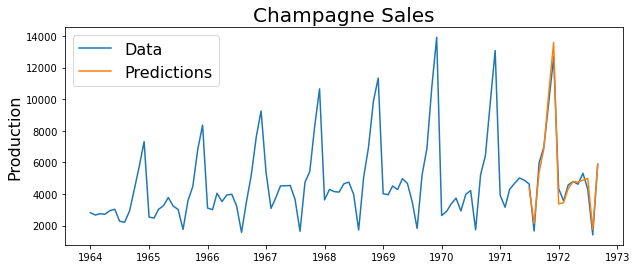

In [82]:
# again: use a rolling forecast taking into account actual data to predict next month
    

# plot to compare



In [83]:
# calculate residuals and errors metrics


Mean Absolute Percent Error: 0.0944
Root Mean Squared Error: 493.7787


This looks very promising now. Let's now predict 24 months into the future.

## Step 6: Predict further into the future

In [ ]:
# create new dates and add them to the existing dataframe 



<AxesSubplot:>

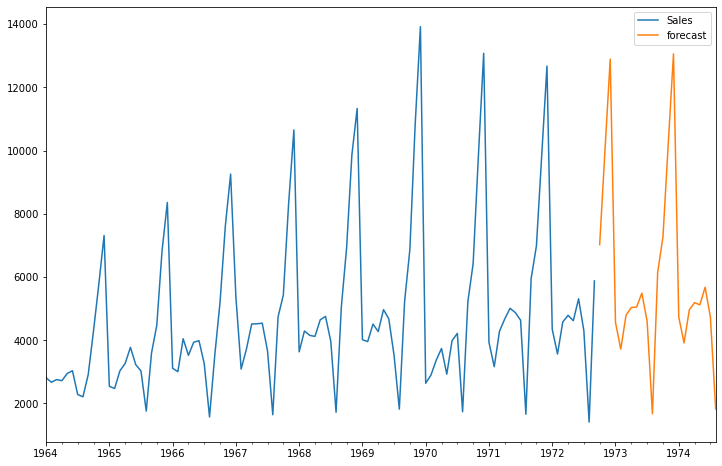

In [85]:
# fit SARIMA model on the whole dataset and predict for the new set of dates into the future

# plot to compare
